In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [3]:
# search for csv location

found = []

def find(name):
    path = os.getcwd()
    file = name

    for root, dir, files in os.walk(path):
        for item in files:
            if file == item:
                return os.path.join(root, file)
        return None

found.append(find('data_00.csv.gz'))
found.append(find('data_00.csv'))

In [9]:
# load file

for path in found:
    if path is not None:
        if 'gz' in path:
            fileName = path
            df = pd.read_csv(fileName, index_col='datetime', compression='gzip')
            break
        else: 
            fileName = path
            df = pd.read_csv(fileName, index_col='datetime')
            break

In [10]:
df

,cold-water,door,dust,electricity,hid,hot-water,humidity,light,motion,noise,temperature,uid,aid,wearable-mag-xl1,wearable-rss,wearable-xl1-x,wearable-xl1-y,wearable-xl1-z
datetime,,,,,,,,,,,,,,,,,,
2016-05-31 21:59:59.919856+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0aa05543a5c2,0xb827eb524fec,-0.050446,-86.0,-0.648,0.238,-0.652
2016-05-31 21:59:59.969904+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0aa05543a5c2,0xb827eb524fec,-0.104310,-86.0,-0.574,0.472,-0.500
2016-05-31 22:00:00.019952+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0aa05543a5c2,0xb827eb524fec,-0.087636,-86.0,-0.690,0.338,-0.492
2016-05-31 22:00:00.070000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0aa05543a5c2,0xb827eb524fec,-0.081416,-86.0,-0.658,0.396,-0.504
2016-05-31 22:00:00.119856+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0aa05543a5c2,0xb827eb524fec,-0.143680,-86.0,-0.656,0.328,-0.442
2016-05-31 22:00:00.169904+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0aa05543a5c2,0xb827eb524fec,-0.014990,-86.0,-0.672,0.608,-0.386
2016-05-31 22:00:00.219952+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0aa05543a5c2,0xb827eb524fec,-0.133151,-86.0,-0.648,0.318,-0.480
2016-05-31 22:00:00.243000+00:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.000,NaN,NaN,NaN,S2_B2,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-31 22:00:00.243000+00:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,50.0,NaN,S2_B2,NaN,NaN,NaN,NaN,NaN,NaN


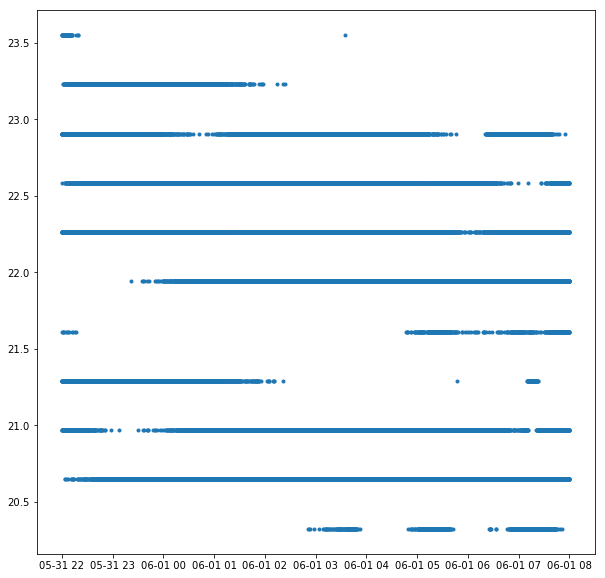

In [23]:
environment_data = df[['cold-water', 'door', 'electricity',
                       'hid', 'hot-water', 'humidity',
                       'light', 'motion', 'noise', 'temperature']]

environment_data

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(pd.to_datetime(environment_data.index), environment_data['temperature'],'.')

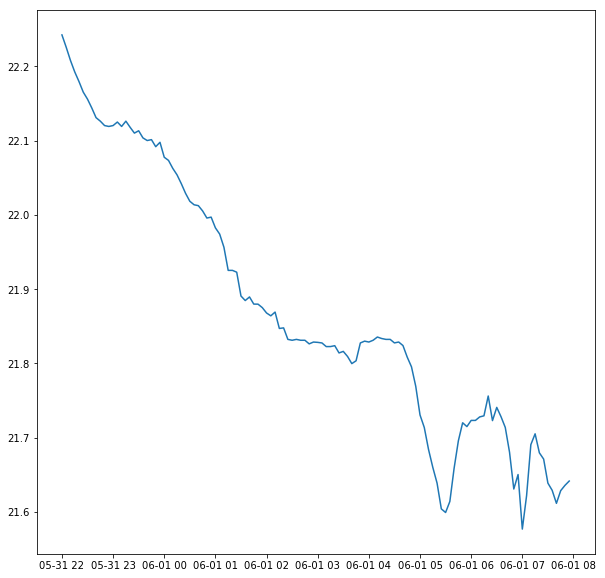

In [33]:
# exclude missing data
temp = environment_data['temperature'].dropna()


resample_interval = '5Min'

# convert index to DatetimeIndex
temp.index = pd.DatetimeIndex(temp.index)

temp_resample = temp.resample(resample_interval).mean()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(temp_resample.index, temp_resample)
